In [2]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import keras.layers as ks
from keras.models import Model
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Exercise 1

In [2]:
(x_data, _), (_, _) = cifar10.load_data()

In [3]:
x_data = x_data.reshape((len(x_data), 32, 32, 3))
x_train, x_temp, _, _ = train_test_split(x_data, x_data, test_size=0.2, random_state=42)
x_val, x_test, _, _ = train_test_split(x_temp, x_temp, test_size=0.5, random_state=42)

x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_gray = np.array([np.dot(image[...,:3], [0.299, 0.587, 0.114]) for image in x_train])
x_train_gray = x_train_gray.reshape(40000,32,32,1)
x_val_gray = np.array([np.dot(image[...,:3], [0.299, 0.587, 0.114]) for image in x_val])
x_val_gray = x_val_gray.reshape(5000,32,32,1)

In [4]:
x_val.shape

(5000, 32, 32, 3)

In [5]:
x_val_gray.shape

(5000, 32, 32, 1)

In [6]:
input_img = Input(shape=(32, 32, 3))
# ks.PreprocessingLayer
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

# At this point, the representation is (8, 8, 16)

x = UpSampling2D((2, 2))(encoded)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
epochs = 10
batch_size = 128

In [8]:
history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 21s 65ms/step - loss: 0.5955 - val_loss: 0.5727
Epoch 2/10
313/313 [==============================] - 19s 61ms/step - loss: 0.5712 - val_loss: 0.5661
Epoch 3/10
313/313 [==============================] - 19s 61ms/step - loss: 0.5674 - val_loss: 0.5638
Epoch 4/10
313/313 [==============================] - 19s 61ms/step - loss: 0.5657 - val_loss: 0.5626
Epoch 5/10
313/313 [==============================] - 19s 61ms/step - loss: 0.5648 - val_loss: 0.5618
Epoch 6/10
313/313 [==============================] - 19s 61ms/step - loss: 0.5641 - val_loss: 0.5612
Epoch 7/10
313/313 [==============================] - 19s 61ms/step - loss: 0.5636 - val_loss: 0.5607
Epoch 8/10
313/313 [==============================] - 19s 61ms/step - loss: 0.5631 - val_loss: 0.5603
Epoch 9/10
313/313 [==============================] - 19s 61ms/step - loss: 0.5628 - val_loss: 0.5600
Epoch 10/10
313/313 [==============================] - 20s 62ms/step - loss: 0.562

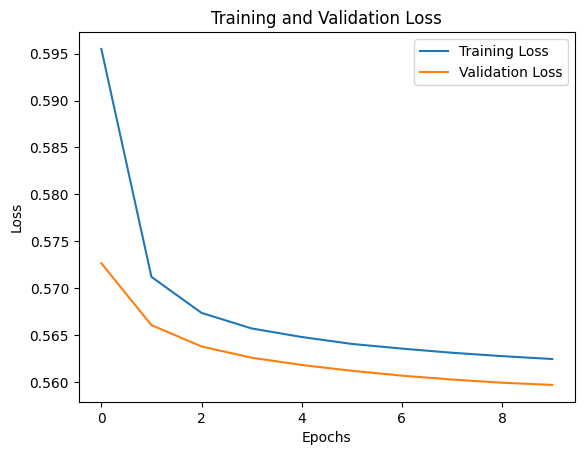

157/157 [==============================] - 1s 6ms/step - loss: 0.5609


0.5609399676322937

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
autoencoder.evaluate(x_test, x_test)

157/157 [==============================] - 1s 6ms/step


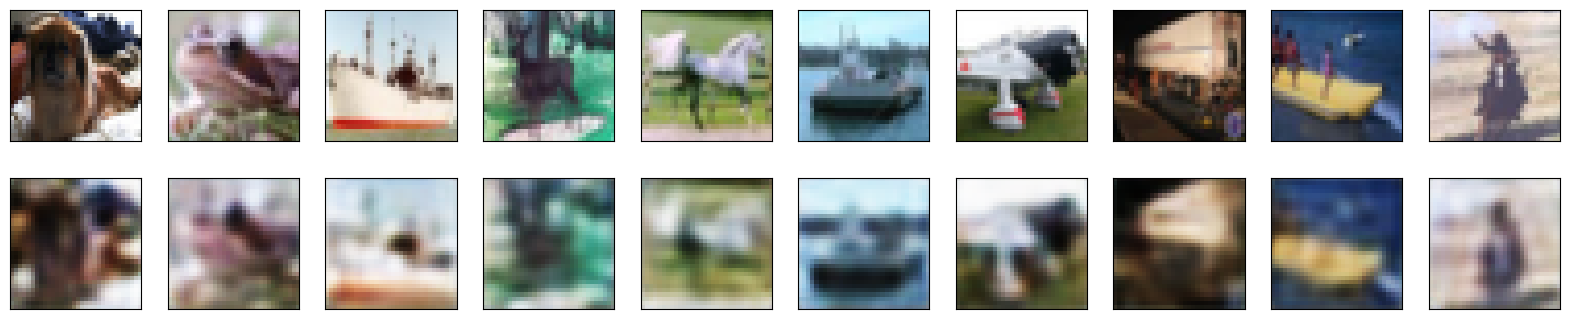

In [13]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [37]:
autoencoder.evaluate(x_test, x_test)

157/157 [==============================] - 1s 6ms/step - loss: 0.5613


0.5613386631011963

In [38]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 12)          0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 16)          1744

The neural network described here is an autoencoder designed for image compression and reconstruction. The input layer is defined with a shape of (32, 32, 3), representing 32x32 pixel RGB images. The encoder section consists of convolutional layers with rectified linear unit (ReLU) activation and max-pooling operations, progressively reducing the spatial dimensions. The encoded layer has 16 filters and a (8, 8, 16) output shape. The decoder section uses upsampling layers to reconstruct the original image dimensions. The decoder also uses convolutional layers with ReLU activation, and the final layer uses sigmoid activation to produce pixel values in the range [0, 1]. The model is compiled with the Adam optimizer and binary cross-entropy loss. This architecture is used to learn a compact representation of the input images in the encoded layer, which in turn enables efficient reconstruction during the decoding phase.

# Exercise 2

In [39]:
layers = [Conv2D, MaxPooling2D, UpSampling2D]

In [40]:
def model_builder(structure, model_params):
    latent_space_sizes = list()
    input_img = Input(shape=(32, 32, 3))
    input_volume = 32
    padding = 1
    ## Set up the first layer
    params = structure[0]["params"]
    x = Conv2D(params[0], params[1], activation=params[3], padding=params[4], strides=params[5])(input_img)
    # calculate layer rep. size for first layer
    input_volume = input_volume / params[2]
    latent_space_sizes.append(get_conv_layer_representation_size(input_volume, params[1][0], padding, params[2], params[0]))

    ## set up the remaining layers
    structure = structure[1:]
    for i,layer in enumerate(structure):
        params = layer["params"]
        if layer["layer"] == 0:
            x = Conv2D(params[0], params[1], activation=params[3], padding=params[4], strides=params[5])(x)
            input_volume = input_volume / params[2]
            latent_space_sizes.append(get_conv_layer_representation_size(input_volume, params[1][0], padding, params[2], params[0]))

        elif layer["layer"] == 1:
            x = MaxPooling2D(params[0], padding=params[1])(x)
            input_volume = input_volume / params[0][0]
        elif layer["layer"] == 2:
            x = UpSampling2D(params[0])(x)
            input_volume = input_volume * params[0][0]
    

    autoencoder = Model(input_img, x)
    autoencoder.compile(optimizer=model_params[0], loss=model_params[1])
    return autoencoder, latent_space_sizes

In [41]:
DEBUG = False
def get_conv_layer_representation_size(W, K, P, S, C):
    if (DEBUG):
        print(f"Volume: {W}, kernel size: {K}, padding: {P}, stride:{S}, channels: {C}")
    return int(((((W - K + (2*P))/S) + 1)**2) * C)

In [42]:
### Model 2
model_structure = [{
        "layer": 0,
        "params": [8, (3,3), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [16, (3,3), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 0,
        "params": [3, (3,3), 1, "relu", "same", (1,1)]
    }
]

model_params = ["adam", "binary_crossentropy"]

In [43]:
model2, latent_space_sizes = model_builder(model_structure, model_params)
print(model2.summary())
print(latent_space_sizes)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 up_sampling2d_8 (UpSamplin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 12)        1740

In [44]:
history = model2.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 26s 82ms/step - loss: 0.7693 - val_loss: 0.5705
Epoch 2/10
313/313 [==============================] - 25s 80ms/step - loss: 0.5672 - val_loss: 0.5612
Epoch 3/10
313/313 [==============================] - 25s 79ms/step - loss: 0.5628 - val_loss: 0.5590
Epoch 4/10
313/313 [==============================] - 24s 77ms/step - loss: 0.5614 - val_loss: 0.5587
Epoch 5/10
313/313 [==============================] - 24s 77ms/step - loss: 0.5595 - val_loss: 0.5562
Epoch 6/10
313/313 [==============================] - 24s 77ms/step - loss: 0.5604 - val_loss: 0.5596
Epoch 7/10
313/313 [==============================] - 24s 77ms/step - loss: 0.5575 - val_loss: 0.5542
Epoch 8/10
313/313 [==============================] - 24s 77ms/step - loss: 0.5574 - val_loss: 0.5539
Epoch 9/10
313/313 [==============================] - 24s 76ms/step - loss: 0.5562 - val_loss: 0.5528
Epoch 10/10
313/313 [==============================] - 25s 79ms/step - loss: 0.556

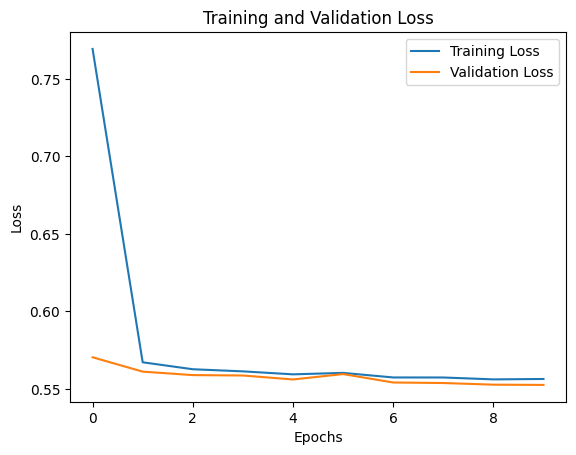

157/157 [==============================] - 1s 7ms/step - loss: 0.5539


0.5539492964744568

In [45]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model2.evaluate(x_test, x_test)

In [46]:
### Model 3
model_structure = [{
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [16, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [32, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [3, (3,3), 1, "relu", "same"]
    }
]

model_params = ["adam", "binary_crossentropy"]

In [47]:
model3, latent_space_sizes = model_builder(model_structure, model_params)
print(model3.summary())
print(latent_space_sizes)

IndexError: list index out of range

In [ ]:
history = model3.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 40s 122ms/step - loss: 0.6662 - val_loss: 0.5808
Epoch 2/10
313/313 [==============================] - 36s 116ms/step - loss: 0.5805 - val_loss: 0.5742
Epoch 3/10
313/313 [==============================] - 37s 119ms/step - loss: 0.5804 - val_loss: 0.5737
Epoch 4/10
313/313 [==============================] - 38s 121ms/step - loss: 0.5722 - val_loss: 0.5678
Epoch 5/10
313/313 [==============================] - 37s 117ms/step - loss: 0.5710 - val_loss: 0.5666
Epoch 6/10
313/313 [==============================] - 41s 131ms/step - loss: 0.5686 - val_loss: 0.5649
Epoch 7/10
313/313 [==============================] - 37s 118ms/step - loss: 0.5699 - val_loss: 0.5647
Epoch 8/10
313/313 [==============================] - 37s 117ms/step - loss: 0.5704 - val_loss: 0.5702
Epoch 9/10
313/313 [==============================] - 40s 128ms/step - loss: 0.5681 - val_loss: 0.5638
Epoch 10/10
313/313 [==============================] - 39s 126ms/step - l

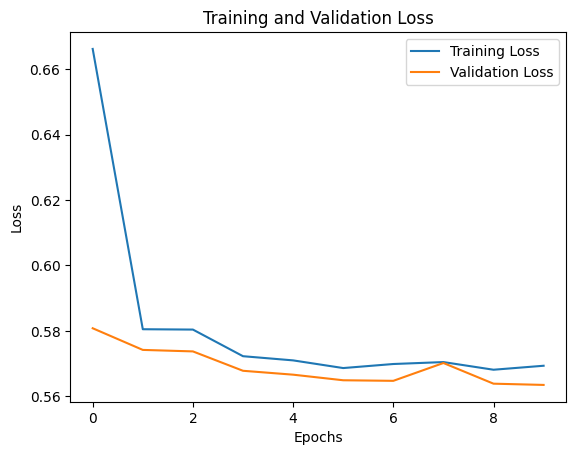

157/157 [==============================] - 1s 8ms/step - loss: 0.5646


0.5646378397941589

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model3.evaluate(x_test, x_test)

In [ ]:
### Model 4
model_structure = [{
        "layer": 0,
        "params": [6, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [8, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [8, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [3, (3,3), 1, "relu", "same"]
    }
]

model_params = ["adam", "binary_crossentropy"]

In [ ]:
model4, latent_space_sizes = model_builder(model_structure, model_params)
print(model4.summary())
print(latent_space_sizes)

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_130 (Conv2D)         (None, 32, 32, 6)         168       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_131 (Conv2D)         (None, 16, 16, 8)         440       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 8, 8, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_132 (Conv2D)         (None, 8, 8, 12)          876

In [ ]:
history = model4.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 30s 92ms/step - loss: 0.6512 - val_loss: 0.6159
Epoch 2/10
313/313 [==============================] - 27s 85ms/step - loss: 0.5959 - val_loss: 0.5932
Epoch 3/10
313/313 [==============================] - 26s 85ms/step - loss: 0.5904 - val_loss: 0.5855
Epoch 4/10
313/313 [==============================] - 26s 84ms/step - loss: 0.5881 - val_loss: 0.5845
Epoch 5/10
313/313 [==============================] - 27s 86ms/step - loss: 0.5823 - val_loss: 0.5772
Epoch 6/10
313/313 [==============================] - 27s 87ms/step - loss: 0.5800 - val_loss: 0.5780
Epoch 7/10
313/313 [==============================] - 26s 85ms/step - loss: 0.5776 - val_loss: 0.5791
Epoch 8/10
313/313 [==============================] - 27s 86ms/step - loss: 0.5775 - val_loss: 0.5728
Epoch 9/10
313/313 [==============================] - 27s 86ms/step - loss: 0.5755 - val_loss: 0.5718
Epoch 10/10
313/313 [==============================] - 27s 86ms/step - loss: 0.575

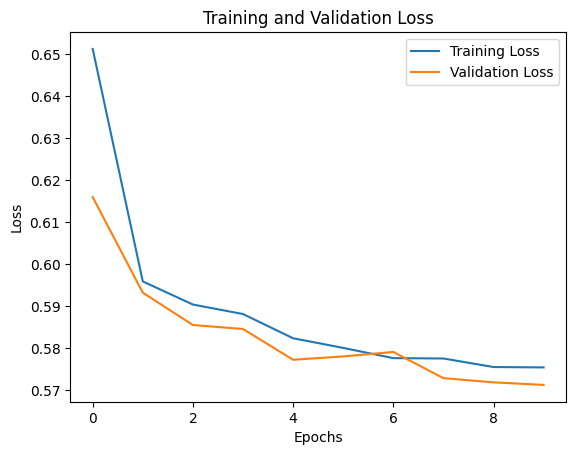

157/157 [==============================] - 1s 9ms/step - loss: 0.5725


0.5724728107452393

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model4.evaluate(x_test, x_test)

In [ ]:
### model 5
model_structure = [{
        "layer": 0,
        "params": [8, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [32, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [3, (3,3), 1, "relu", "same"]
    }
]

model_params = ["adam", "binary_crossentropy"]

In [ ]:
model5, latent_space_sizes = model_builder(model_structure, model_params)
print(model5.summary())
print(latent_space_sizes)

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_140 (Conv2D)         (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_141 (Conv2D)         (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 8, 8, 12)         0         
 g2D)                                                            
                                                                 
 conv2d_142 (Conv2D)         (None, 8, 8, 32)          348

In [ ]:
history = model5.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 40s 121ms/step - loss: 0.6937 - val_loss: 0.5876
Epoch 2/10
313/313 [==============================] - 33s 105ms/step - loss: 0.5889 - val_loss: 0.5816
Epoch 3/10
313/313 [==============================] - 33s 105ms/step - loss: 0.5785 - val_loss: 0.5755
Epoch 4/10
313/313 [==============================] - 33s 106ms/step - loss: 0.5739 - val_loss: 0.5692
Epoch 5/10
313/313 [==============================] - 33s 106ms/step - loss: 0.5715 - val_loss: 0.5671
Epoch 6/10
313/313 [==============================] - 33s 106ms/step - loss: 0.5744 - val_loss: 0.5669
Epoch 7/10
313/313 [==============================] - 33s 107ms/step - loss: 0.5692 - val_loss: 0.5652
Epoch 8/10
313/313 [==============================] - 33s 106ms/step - loss: 0.5690 - val_loss: 0.5653
Epoch 9/10
313/313 [==============================] - 33s 106ms/step - loss: 0.5709 - val_loss: 0.5653
Epoch 10/10
313/313 [==============================] - 33s 106ms/step - l

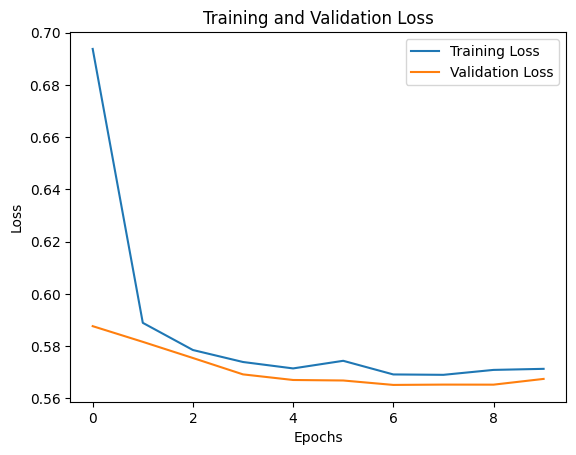

157/157 [==============================] - 1s 8ms/step - loss: 0.5686


0.5686220526695251

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model5.evaluate(x_test, x_test)

In [ ]:
### model 6
model_structure = [{
        "layer": 0,
        "params": [8, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [64, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [3, (3,3), 1, "relu", "same"]
    }
]

model_params = ["adam", "binary_crossentropy"]

In [ ]:
model6, latent_space_sizes = model_builder(model_structure, model_params)
print(model6.summary())
print(latent_space_sizes)

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_155 (Conv2D)         (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_156 (Conv2D)         (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 8, 8, 12)         0         
 g2D)                                                            
                                                                 
 conv2d_157 (Conv2D)         (None, 8, 8, 64)          697

In [ ]:
history = model6.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 44s 134ms/step - loss: 0.6283 - val_loss: 0.5815
Epoch 2/10
313/313 [==============================] - 40s 127ms/step - loss: 0.5831 - val_loss: 0.5755
Epoch 3/10
313/313 [==============================] - 40s 128ms/step - loss: 0.5750 - val_loss: 0.5706
Epoch 4/10
313/313 [==============================] - 41s 131ms/step - loss: 0.5745 - val_loss: 0.5751
Epoch 5/10
313/313 [==============================] - 40s 127ms/step - loss: 0.5737 - val_loss: 0.5677
Epoch 6/10
313/313 [==============================] - 42s 133ms/step - loss: 0.5695 - val_loss: 0.5657
Epoch 7/10
313/313 [==============================] - 40s 127ms/step - loss: 0.5701 - val_loss: 0.5646
Epoch 8/10
313/313 [==============================] - 39s 126ms/step - loss: 0.5695 - val_loss: 0.5677
Epoch 9/10
313/313 [==============================] - 39s 126ms/step - loss: 0.5685 - val_loss: 0.5635
Epoch 10/10
313/313 [==============================] - 39s 124ms/step - l

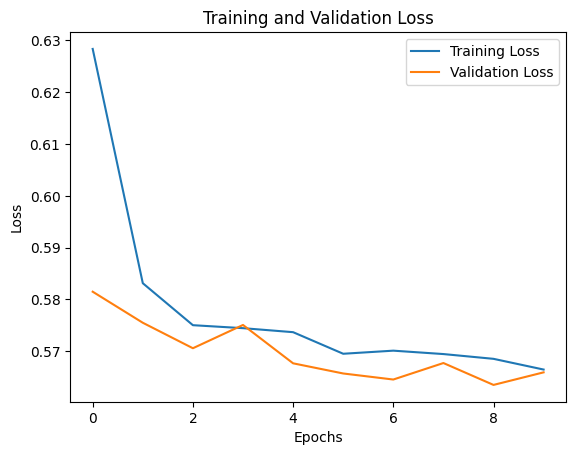

157/157 [==============================] - 2s 11ms/step - loss: 0.5671


0.5671371221542358

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model6.evaluate(x_test, x_test)

In [ ]:
### model 7
model_structure = [{
        "layer": 0,
        "params": [8, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [8, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [3, (3,3), 1, "relu", "same"]
    }
]

model_params = ["adam", "binary_crossentropy"]

In [ ]:
model7, latent_space_sizes = model_builder(model_structure, model_params)
print(model7.summary())
print(latent_space_sizes)

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_160 (Conv2D)         (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_161 (Conv2D)         (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 8, 8, 12)         0         
 g2D)                                                            
                                                                 
 conv2d_162 (Conv2D)         (None, 8, 8, 8)           872

In [ ]:
history = model7.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 33s 101ms/step - loss: 0.7067 - val_loss: 0.5949
Epoch 2/10
313/313 [==============================] - 29s 91ms/step - loss: 0.5901 - val_loss: 0.5820
Epoch 3/10
313/313 [==============================] - 29s 92ms/step - loss: 0.5847 - val_loss: 0.5796
Epoch 4/10
313/313 [==============================] - 29s 92ms/step - loss: 0.5804 - val_loss: 0.5764
Epoch 5/10
313/313 [==============================] - 29s 92ms/step - loss: 0.5781 - val_loss: 0.5745
Epoch 6/10
313/313 [==============================] - 28s 91ms/step - loss: 0.5764 - val_loss: 0.5728
Epoch 7/10
313/313 [==============================] - 29s 92ms/step - loss: 0.5750 - val_loss: 0.5716
Epoch 8/10
313/313 [==============================] - 29s 91ms/step - loss: 0.5750 - val_loss: 0.5748
Epoch 9/10
313/313 [==============================] - 29s 93ms/step - loss: 0.5749 - val_loss: 0.5731
Epoch 10/10
313/313 [==============================] - 29s 91ms/step - loss: 0.57

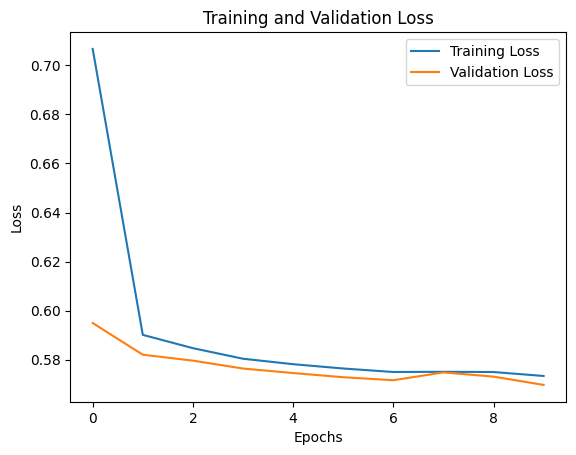

157/157 [==============================] - 1s 8ms/step - loss: 0.5709


0.5708662867546082

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model7.evaluate(x_test, x_test)

In [ ]:
### model 8
model_structure = [{
        "layer": 0,
        "params": [8, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [4, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [3, (3,3), 1, "relu", "same"]
    }
]

model_params = ["adam", "binary_crossentropy"]

In [ ]:
model8, latent_space_sizes = model_builder(model_structure, model_params)
print(model8.summary())
print(latent_space_sizes)

Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_170 (Conv2D)         (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_171 (Conv2D)         (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 8, 8, 12)         0         
 g2D)                                                            
                                                                 
 conv2d_172 (Conv2D)         (None, 8, 8, 4)           436

In [ ]:
history = model8.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 30s 89ms/step - loss: 0.7503 - val_loss: 0.6123
Epoch 2/10
313/313 [==============================] - 27s 88ms/step - loss: 0.6038 - val_loss: 0.5934
Epoch 3/10
313/313 [==============================] - 27s 87ms/step - loss: 0.5916 - val_loss: 0.5868
Epoch 4/10
313/313 [==============================] - 28s 90ms/step - loss: 0.5865 - val_loss: 0.5818
Epoch 5/10
313/313 [==============================] - 28s 88ms/step - loss: 0.5845 - val_loss: 0.5798
Epoch 6/10
313/313 [==============================] - 28s 88ms/step - loss: 0.5828 - val_loss: 0.5776
Epoch 7/10
313/313 [==============================] - 27s 87ms/step - loss: 0.5790 - val_loss: 0.5746
Epoch 8/10
313/313 [==============================] - 28s 89ms/step - loss: 0.5761 - val_loss: 0.5721
Epoch 9/10
313/313 [==============================] - 28s 90ms/step - loss: 0.5794 - val_loss: 0.5727
Epoch 10/10
313/313 [==============================] - 33s 106ms/step - loss: 0.57

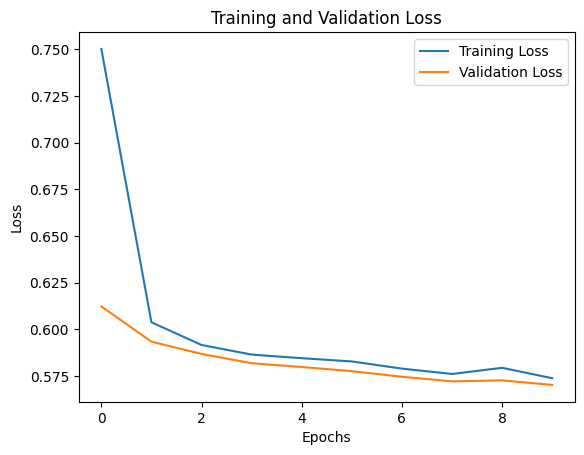

157/157 [==============================] - 1s 8ms/step - loss: 0.5715


0.5715198516845703

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model8.evaluate(x_test, x_test)

### Varying filter Size of convolutional layer


In [ ]:
### filter size 2x2
model_structure_2 = [{
        "layer": 0,
        "params": [8, (2,2), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [12, (2,2), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [16, (2,2), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [12, (2,2), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [3, (2,2), 1, "relu", "same", (1,1)]
    }
]

model_params = ["adam", "binary_crossentropy"]

In [ ]:
### filter size 4x4
model_structure_4 = [{
        "layer": 0,
        "params": [8, (4,4), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [12, (4,4), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [16, (4,4), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [12, (4,4), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [3, (4,4), 1, "relu", "same", (1,1)]
    }
]

model_params = ["adam", "binary_crossentropy"]

In [ ]:
### filter size 5x5
model_structure_5 = [{
        "layer": 0,
        "params": [8, (5,5), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [12, (5,5), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [16, (5,5), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [12, (5,5), 1, "relu", "same", (1,1)]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [3, (5,5), 1, "relu", "same", (1,1)]
    }
]

model_params = ["adam", "binary_crossentropy"]

In [ ]:
model9, latent_space_sizes = model_builder(model_structure_2, model_params)
print(model9.summary())
print(latent_space_sizes)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 8)         104       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 12)        396       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 12)         0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 8, 8, 16)          784 

In [ ]:
model10, latent_space_sizes = model_builder(model_structure_4, model_params)
print(model10.summary())
print(latent_space_sizes)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 8)         392       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 12)        1548      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 12)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 16)          3088

In [ ]:
model11, latent_space_sizes = model_builder(model_structure_5, model_params)
print(model11.summary())
print(latent_space_sizes)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 8)         608       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 12)        2412      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 12)         0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 16)          4816

In [ ]:
history9 = model9.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

history10 = model10.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

history11 = model11.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
313/313 [==============================] - 31s 95ms/step - loss: 0.7186 - val_loss: 0.5993
Epoch 2/10
313/313 [==============================] - 26s 82ms/step - loss: 0.5937 - val_loss: 0.5867
Epoch 3/10
313/313 [==============================] - 24s 76ms/step - loss: 0.5872 - val_loss: 0.5829
Epoch 4/10
313/313 [==============================] - 22s 71ms/step - loss: 0.5850 - val_loss: 0.5813
Epoch 5/10
313/313 [==============================] - 22s 71ms/step - loss: 0.5820 - val_loss: 0.5879
Epoch 6/10
313/313 [==============================] - 22s 71ms/step - loss: 0.5810 - val_loss: 0.5772
Epoch 7/10
313/313 [==============================] - 22s 70ms/step - loss: 0.5806 - val_loss: 0.5770
Epoch 8/10
313/313 [==============================] - 25s 79ms/step - loss: 0.5784 - val_loss: 0.5753
Epoch 9/10
313/313 [==============================] - 25s 79ms/step - loss: 0.5795 - val_loss: 0.5751
Epoch 10/10
313/313 [==============================] - 22s 70ms/step - loss: 0.577

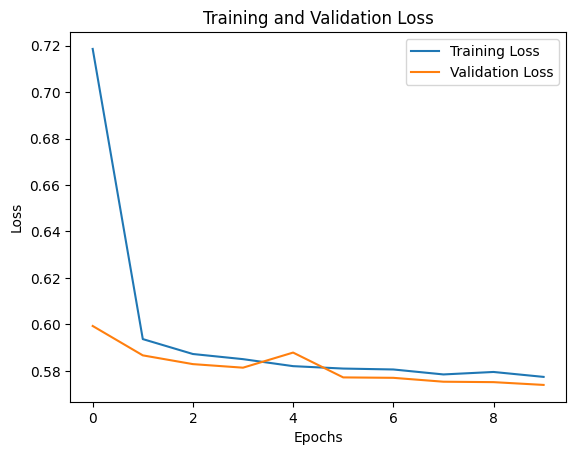

157/157 [==============================] - 1s 6ms/step - loss: 0.5751


0.5751383900642395

In [ ]:
plt.plot(history9.history['loss'], label='Training Loss')
plt.plot(history9.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model9.evaluate(x_test, x_test)

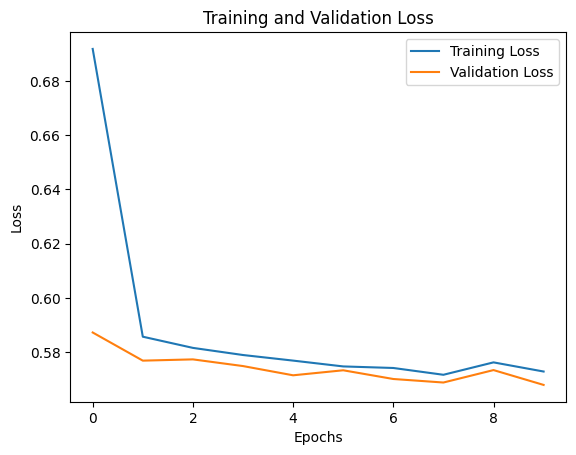

157/157 [==============================] - 2s 11ms/step - loss: 0.5692


0.5691657066345215

In [ ]:
plt.plot(history10.history['loss'], label='Training Loss')
plt.plot(history10.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model10.evaluate(x_test, x_test)

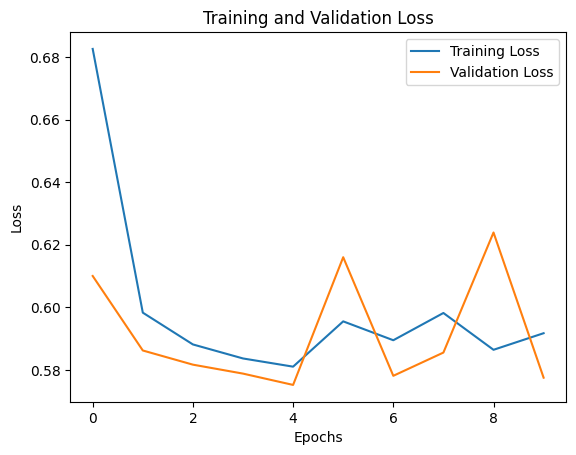

157/157 [==============================] - 2s 13ms/step - loss: 0.5788


0.5788149833679199

In [ ]:
plt.plot(history11.history['loss'], label='Training Loss')
plt.plot(history11.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model11.evaluate(x_test, x_test)

In [ ]:
### Save this
model_structure = [{
        "layer": 0,
        "params": [8, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 1,
        "params": [(2,2), "same"]
    },
    {
        "layer": 0,
        "params": [16, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [12, (3,3), 1, "relu", "same"]
    },
    {
        "layer": 2,
        "params": [(2,2)]
    },
    {
        "layer": 0,
        "params": [3, (3,3), 1, "relu", "same"]
    }
]

model_params = ["adam", "binary_crossentropy"]

# Exercise 3

In [60]:
input_img = Input(shape=(32, 32, 1))


x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

# At this point, the representation is (8, 8, 16)

x = UpSampling2D((2, 2))(encoded)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [61]:
print(autoencoder.summary())

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 8)         80        
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 8, 8, 12)          0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 8, 8, 16)          174

In [62]:
history = autoencoder.fit(x_train_gray, x_train,
                epochs=50,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val_gray, x_val))

Epoch 1/50
313/313 [==============================] - 20s 61ms/step - loss: 0.6009 - val_loss: 0.5812
Epoch 2/50
313/313 [==============================] - 19s 61ms/step - loss: 0.5809 - val_loss: 0.5765
Epoch 3/50
313/313 [==============================] - 19s 62ms/step - loss: 0.5783 - val_loss: 0.5750
Epoch 4/50
313/313 [==============================] - 19s 62ms/step - loss: 0.5768 - val_loss: 0.5738
Epoch 5/50
313/313 [==============================] - 20s 64ms/step - loss: 0.5757 - val_loss: 0.5726
Epoch 6/50
313/313 [==============================] - 20s 63ms/step - loss: 0.5750 - val_loss: 0.5722
Epoch 7/50
313/313 [==============================] - 19s 60ms/step - loss: 0.5744 - val_loss: 0.5720
Epoch 8/50
313/313 [==============================] - 20s 63ms/step - loss: 0.5739 - val_loss: 0.5710
Epoch 9/50
313/313 [==============================] - 20s 65ms/step - loss: 0.5735 - val_loss: 0.5708
Epoch 10/50
313/313 [==============================] - 19s 62ms/step - loss: 0.573

In [3]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from keras.models import Model

# Grayscale conversion
x_train_gray = np.dot(x_train[...,:3], [0.299, 0.587, 0.114]).reshape(-1, 32, 32, 1)
x_val_gray = np.dot(x_val[...,:3], [0.299, 0.587, 0.114]).reshape(-1, 32, 32, 1)

input_img = Input(shape=(32, 32, 1))  # Grayscale input

# Encoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

# Decoder for chrominance channels
x = UpSampling2D((2, 2))(encoded)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_uv = Conv2D(2, (3, 3), activation='tanh', padding='same')(x)  # Output 2 channels for chrominance

# Combine with original luminance channel
decoded = concatenate([input_img, decoded_uv], axis=-1)

autoencoder = Model(input_img, decoded) 
autoencoder.compile(optimizer='adam', loss='mse')

epochs = 10
batch_size = 128

history = autoencoder.fit(x_train_gray, x_train_gray,  # Input and output are the same for unsupervised learning
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_val_gray, x_val_gray))

NameError: name 'x_train' is not defined

The encoder compresses the grayscale input through convolutional and max-pooling layers, creating a compact representation in a 16-channel layer. The decoder then upsamples this representation, processing it through convolutional layers to reconstruct the chrominance channels (U and V) in the output. The final step involves combining the original luminance channel with the decoded chrominance channels.

In [4]:
decoded_imgs = autoencoder.predict(x_val_gray)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val_gray[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    print("wewlad")
    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

NameError: name 'autoencoder' is not defined